***Context***

***This is the sentiment140 dataset. It contains around 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .***

**Content**

It contains the following 6 fields:

target  :  The polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids               :  The id of the tweet ( 2087)

date        :  The date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag       :  The query (lyx). If there is no query, then this value is NO_QUERY.

user        :  The user that tweeted (robotickilldozr)

text       :  The text of the tweet (Lyx is cool)

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [2]:
# Read data
data = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',
                   encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**Here I can see data having no header so I can fix header**

In [3]:
# set columns header
data.columns = ['Target','ids','Date','Flag','User','Text']
data

,Target,ids,Date,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Perfrom EDA on Data

In [4]:
print("The shape of Data is : ",data.shape)

The shape of Data is :  (1599999, 6)


In [5]:
# count of data
data.count()

Target    1599999
ids       1599999
Date      1599999
Flag      1599999
User      1599999
Text      1599999
dtype: int64

In [6]:
# Check data having missing values or not 
data.isnull().sum()

Target    0
ids       0
Date      0
Flag      0
User      0
Text      0
dtype: int64

**There is no missing values in Data so I can perform Analysis**

In [7]:
# check info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   Date    1599999 non-null  object
 3   Flag    1599999 non-null  object
 4   User    1599999 non-null  object
 5   Text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


**From this I get to know there are no missing values as well as 2 integer and 4 object datatype but 
date should be in datetime format so I will use pd.datetime()**

In [8]:
data['Date']=  pd.to_datetime(data['Date'], infer_datetime_format=True)

In [9]:
# again check info to see changes are done or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Target  1599999 non-null  int64         
 1   ids     1599999 non-null  int64         
 2   Date    1599999 non-null  datetime64[ns]
 3   Flag    1599999 non-null  object        
 4   User    1599999 non-null  object        
 5   Text    1599999 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


In [10]:
# see final data after changes 
data.head()

,Target,ids,Date,Flag,User,Text
0,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**Here I can see date object is converted into datetime format**

In [11]:
# find most frequent user tweet
data["User"].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
iheartrobpattz       1
67trinity            1
Sibby                1
mAnyA_15             1
bpbabe               1
Name: User, Length: 659775, dtype: int64

***here we can see that above 300 (lost_dog,webwoke,tweetpet) this user tweet most***

In [12]:
# summary statastic of data
round(data[["Target"]].describe(),2)

,Target
count,1599999.0
mean,2.0
std,2.0
min,0.0
25%,0.0
50%,4.0
75%,4.0
max,4.0


***Target value minium is 0 means negative and maximum 4 is positive***

In [13]:
# count of target variable
data["Target"].value_counts()

4    800000
0    799999
Name: Target, dtype: int64

In [14]:
# lets set Target 4 as positive tweets and 0 as negative
data["Target"] = data["Target"].replace(4,"Positive")
data["Target"] = data["Target"].replace(0,"Negative")


<Figure size 2000x1000 with 0 Axes>

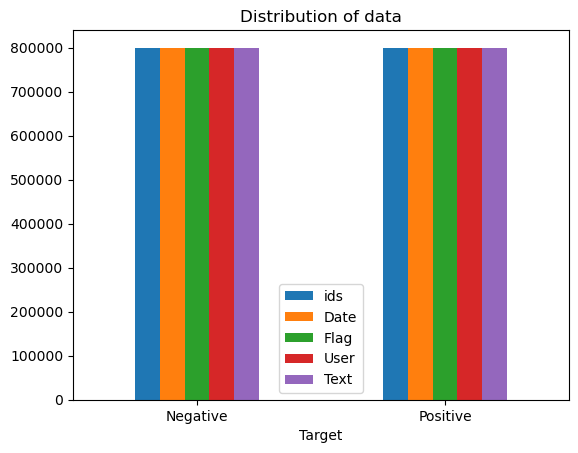

In [15]:
# Plotting the distribution for dataset.

#set figure size
fig = plt.figure(figsize = (20, 10))

ax = data.groupby("Target").count().plot(kind='bar', title='Distribution of data',
                                         legend=True)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(data['Text']), list(data["Target"])

<Axes: xlabel='Target', ylabel='count'>

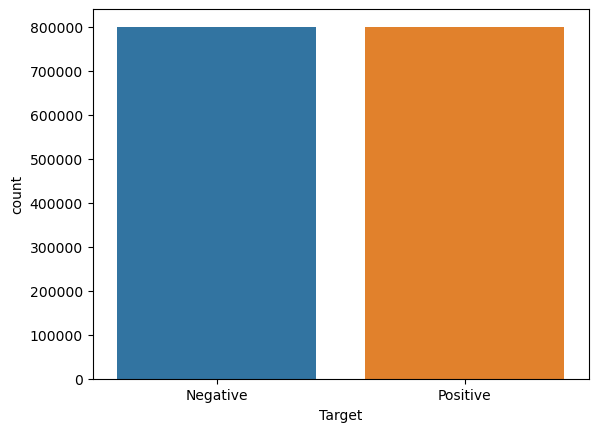

In [16]:
# count plot for target variable
import  seaborn as sns
sns.countplot(x='Target', data=data)

***I must say data is varient it constantly change last time output shows that most of the tweets are positive and now there are  almost same number of negative tweets***

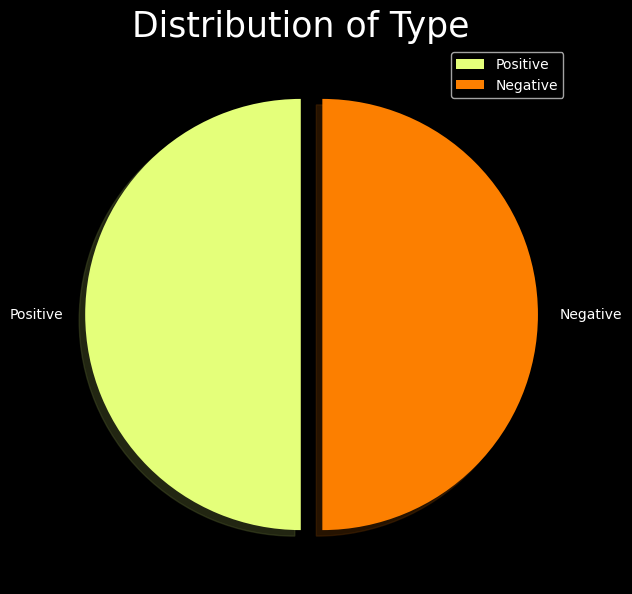

In [17]:
# plot pie for Distribution of negative and positive Tweets

plt.style.use("dark_background")
labels = ['Positive', 'Negative']
size = data['Target'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size,labels=labels, colors = colors, explode = explode, 
        shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

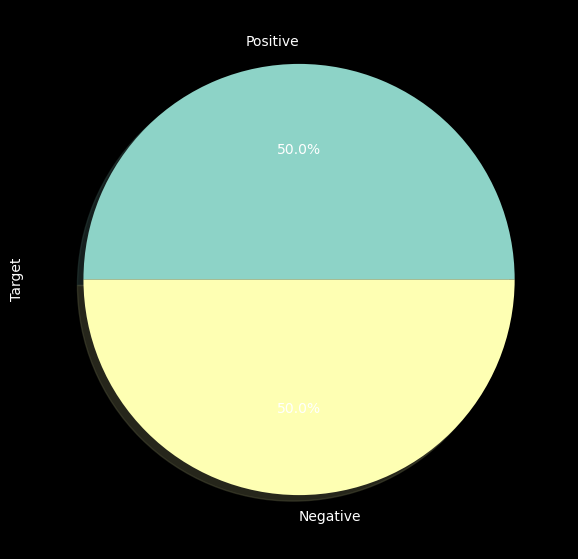

In [18]:
# plt.style.use("dark_background")
data['Target'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(7,7))
plt.show()

# ***EDA is Done after this I come to the conclusion that data is approximate equaly distributed***